# Deep Learning
# DL05 Validacion_Dropout_Pytorch



## <font color='blue'>**Overfitting y Dropout**</font>

Ahora que se tiene una red entrenada, se puede usar para hacer predicciones. Esto generalmente se llama **inferencia**. Sin embargo, las redes neuronales tienden a funcionar *demasiado bien* en los datos de entrenamiento y no pueden generalizarse a datos que no se han visto antes. Esto se llama **sobreajuste (Overfitting)** y perjudica el rendimiento de la inferencia. Para probar si una red esta sobreajustada durante el entrenamiento, medimos el rendimiento en datos que no están en el conjunto de entrenamiento llamado conjunto de **validación**. Evitamos el sobreajuste a través de la regularización, como el dropout, mientras supervisamos el rendimiento de validación durante el entrenamiento.
 Esta vez aprovecharemos el conjunto de pruebas que puede obtener configurando `train = False` aquí:


```python
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```
El conjunto de prueba contiene imágenes al igual que el conjunto de entrenamiento. Por lo general, verá el 10-20% del conjunto de datos original para pruebas y validación, y el resto se utilizará para la entrenamiento.

![Backpropagation](https://drive.google.com/uc?export=view&id=1Sf6I7h4gP0EJySDEYt04AfPcBh2zRbmK)

### Características Generales

Vamos a trabajar el concepto de dropout con Fashion-MNIST. 
Al igual que su laureado y reconocido predecesor, Fashion-MNIST se compone de imágenes en escala de grises, de 28×28 pixeles. 

60.000 imágenes componen Fashion-MNIST, donde 50.000 de ellas son para entrenamiento, y las restantes 10.000 para pruebas. Todas las categorías (10) poseen 6.000 imágenes, lo que implica que el dataset está balanceado.

A diferencia del MNIST tradicional, las categorías no son números del 0 al 9 escritos a mano alzada, sino prendas de vestir, como se puede suponer por su nombre. En particular, estas son las categorías:

1. T-shirt/top (Camiseta o top).
2. Trouser/pants (Pantalones).
3. Pullover shirt (Pullover).
4. Dress (Vestido).
5. Coat (Abrigo).
6. Sandal (Sandalias).
7. Shirt (Camisa).
8. Sneaker (Zapatos deportivos).
9. Bag (Bolso o maleta)
10. Ankle boot (Botines).

### Generemos los conjuntos de entrenamiento y validación. 

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split
import numpy as np

# Se define una normalizacion y trasnformacion de la data.
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Cargamos los datos que utilizaremos para entrenar. 
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Esto lo hacemos para que el entrenamiento sea mas rapido, bajamos el conjunto.
trainset_sample, trainset_val = random_split(trainset, (10000,50000))

# si van a hacer validacion , el random split deberia ser de esta forma  random_split(trainset, (50000,10000))


trainloader = torch.utils.data.DataLoader(trainset_sample, batch_size=64, shuffle=True)
trainval = torch.utils.data.DataLoader(trainset_val, batch_size=64, shuffle=True)

# torch.utils.data.DataLoader([[1,2,3],[1,2,3]], batch_size=64, shuffle=True)

# Cargamos los datos que utilizamos para validar. 
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
len(trainloader),len(trainval)

(157, 782)

tensor(1)


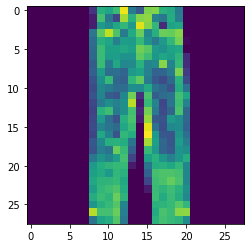

In [ ]:
# Miremos el dataset
import matplotlib.pyplot as plt

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[10]
print(labels[10])
img.view(1, 28, 28)
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze())


### Construyendo y evaluando la red.

El objetivo de la validación es medir el rendimiento del modelo en datos que no forman parte del conjunto de entrenamiento.  Por lo general, esto es solo medir la precisión, el porcentaje de clases que la red predijo correctamente. Otras opciones son [precisión y recuperación] (https://en.wikipedia.org/wiki/Precision_and_recall#Definition_ (class_context)) y la tasa de error de top 5. Nos centraremos en la precisión aquí. Que metrica utilizará a depender del problemaque se está resolviendo.



```
class Classifier(nn.Module):
  def __init__(self):


  def forward(self, x):
  
  
  return x


model = Classifier()

images, labels = next(iter(testloader))
# Obtenga las probabilidades de las clases
ps = torch.exp(model(images))
# Se deberia obtener 10 clases 64 ejemplos. 
print(ps.shape)
----------------------------------------------------
torch.Size([64, 10])
```



Con las probabilidades, podemos obtener la clase más probable utilizando el método `ps.topk`. Esto devuelve los valores más altos de $ k $. Como solo queremos la clase más probable, podemos usar `ps.topk (1)`. Esto devuelve una tupla de los valores superiores- $ k $ y los índices superiores- $ k $. Si el valor más alto es el quinto elemento, obtendremos 4 como índice.



```
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
```



Ahora podemos verificar si las clases predichas coinciden con las etiquetas. Esto es simple de hacer al igualar `top_class` y` labels`, pero debemos tener cuidado con las formas. Aquí `top_class` es un tensor 2D con forma` (64, 1) `mientras que` labels` es 1D con forma `(64)`. Para que la igualdad funcione de la manera que queremos, `top_class` y` labels` deben tener la misma forma.

Si hacemos

```
equals = top_class == labels.view(*top_class.shape)
```

`equals` tendrá forma` (64, 64) `. Lo que está haciendo es comparar un elemento en cada fila de `top_class` con cada elemento en` labels` que devuelve 64 valores booleanos Verdadero / Falso para cada fila.

Ahora necesitamos calcular el porcentaje de predicciones correctas. `equals` tiene valores binarios, ya sea 0 o 1. Esto significa que si solo sumamos todos los valores y dividimos por el número de valores, obtenemos el porcentaje de predicciones correctas. Esta es la misma operación que tomar la media, por lo que podemos obtener la precisión con una llamada a `torch.mean`. 

```
RuntimeError: mean is not implemented for type torch.ByteTensor
```
Esto sucede porque `equals` tiene el tipo` torch.ByteTensor` pero `torch.mean` no está implementado para tensores con ese tipo. Por lo tanto, necesitaremos convertir `igual` a un tensor flotante. Tenga en cuenta que cuando tomamos `torch.mean`, devuelve un tensor escalar, para obtener el valor real como flotante necesitaremos hacer` precision.item () `.



```
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor)) # Conversion de tipo de datos.
print(f'Accuracy: {accuracy.item()*100}%')
```




La red no está entrenada, por lo que está haciendo conjeturas aleatorias y deberíamos ver una precisión de alrededor del 10%. Ahora entrenemos nuestra red e incluyamos nuestro conjunto de test para que podamos medir qué tan bien está funcionando la red. Como no estamos actualizando nuestros parámetros(gradientes) en el momento  de validar, podemos acelerar el proceso apagando los degradados usando `torch.no_grad ()`:


```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...
```


## <font color='green'>**Actividad 5**</font>

En esta actividad vamos a entrenar un modelo para clasificar digitos pero adicionalmente incorporaremos el conjunto de validación.

1. Realice el entrenamiento de la red pero incorpore el conjunto de validación.

2. Recuerde apagar los gradientes en la validación.

Analice y Utilice el siguiente código para trabajar con el conjunto de validación. 

```
        test_loss = 0
        accuracy = 0
        
        # Apagamos los gradientes para la validación. Permite ahorrar memoria y computo. 
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                # Aquí medimos el error en el conjunto de entrenamiento. 
                test_loss += criterion(log_ps, labels)
                # Como es logaritmo de la probabilidad, debemos aplicar la exponencial. 
                ps = torch.exp(log_ps)
                # La clase top 1.
                top_p, top_class = ps.topk(1, dim=1)
                # equals toma valores True or False.
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
```
3. Imprima el trainig loss, Test loss y Test Accuracy.
4. Genere las graficas.

Para que no sea tan lento ponga como maximo 5 epochs.



In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()
model.fc1.weight, model.fc1.bias



(Parameter containing:
 tensor([[-0.0005, -0.0042, -0.0020,  ...,  0.0153,  0.0192,  0.0194],
         [ 0.0133,  0.0090,  0.0348,  ..., -0.0178,  0.0233, -0.0030],
         [ 0.0011, -0.0126,  0.0021,  ..., -0.0315,  0.0345, -0.0024],
         ...,
         [-0.0093,  0.0326,  0.0291,  ...,  0.0341,  0.0002, -0.0277],
         [-0.0135, -0.0071, -0.0064,  ...,  0.0319, -0.0080, -0.0171],
         [-0.0207, -0.0281,  0.0005,  ..., -0.0016,  0.0326, -0.0349]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0033, -0.0063, -0.0291,  0.0340,  0.0168, -0.0047, -0.0005,  0.0056,
         -0.0252,  0.0210, -0.0100,  0.0130, -0.0177,  0.0171,  0.0187, -0.0025,
          0.0128,  0.0119,  0.0071,  0.0268,  0.0243, -0.0055,  0.0155,  0.0122,
         -0.0104,  0.0254,  0.0228, -0.0276, -0.0335,  0.0038,  0.0244, -0.0282,
          0.0226,  0.0051,  0.0196, -0.0144, -0.0313,  0.0062,  0.0176,  0.0010,
          0.0332,  0.0321, -0.0244, -0.0120, -0.0171,  0.0345, -0.0189, -0.0329,

In [ ]:
%%time
model = Classifier()
criterion = nn.NLLLoss() # Funcion loss.
optimizer = optim.Adam(model.parameters(), lr=0.003) # Metodo de optimizacion. 

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        # TO_DO
        # Realice el forward
        log_ps = model(images)
        # Aplique la función de perdida.
        loss = criterion(log_ps, labels)
        # Realice el backward
        loss.backward()
        # Optimice
        optimizer.step()
        # Acumule el running_loss
        running_loss += loss
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Apagamos los gradientes para la validación. Permite ahorrar memoria y computo. 
        with torch.no_grad():
            for images, labels in testloader:

                log_ps = model(images)
                # Aquí medimos el error en el conjunto de entrenamiento. 
                test_loss += criterion(log_ps, labels)
                # Como es logaritmo de la probabilidad, debemos aplicar la exponencial. 
                ps = torch.exp(log_ps)
                # La clase top 1.
                top_p, top_class = ps.topk(1, dim=1)
                # equals toma valores True or False.
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        

Epoch: 1/30..  Training Loss: 0.749..  Test Loss: 0.589..  Test Accuracy: 0.773
Epoch: 2/30..  Training Loss: 0.491..  Test Loss: 0.536..  Test Accuracy: 0.808
Epoch: 3/30..  Training Loss: 0.446..  Test Loss: 0.497..  Test Accuracy: 0.820
Epoch: 4/30..  Training Loss: 0.408..  Test Loss: 0.532..  Test Accuracy: 0.816
Epoch: 5/30..  Training Loss: 0.378..  Test Loss: 0.489..  Test Accuracy: 0.831
Epoch: 6/30..  Training Loss: 0.351..  Test Loss: 0.495..  Test Accuracy: 0.828
Epoch: 7/30..  Training Loss: 0.334..  Test Loss: 0.481..  Test Accuracy: 0.833
Epoch: 8/30..  Training Loss: 0.337..  Test Loss: 0.467..  Test Accuracy: 0.847
Epoch: 9/30..  Training Loss: 0.301..  Test Loss: 0.476..  Test Accuracy: 0.843
Epoch: 10/30..  Training Loss: 0.286..  Test Loss: 0.488..  Test Accuracy: 0.841
Epoch: 11/30..  Training Loss: 0.270..  Test Loss: 0.482..  Test Accuracy: 0.845
Epoch: 12/30..  Training Loss: 0.265..  Test Loss: 0.549..  Test Accuracy: 0.837
Epoch: 13/30..  Training Loss: 0.248.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

Grafique train_losses y test_losses que almacenó anteriormente. 

In [ ]:
train_losses = [loss.detach().numpy() for loss in train_losses]
test_losses = [loss.detach().numpy() for loss in test_losses]
train_losses, test_losses

([array(0.74900836, dtype=float32),
  array(0.49138743, dtype=float32),
  array(0.44610667, dtype=float32),
  array(0.40830117, dtype=float32),
  array(0.3784868, dtype=float32),
  array(0.3505867, dtype=float32),
  array(0.33397543, dtype=float32),
  array(0.33670822, dtype=float32),
  array(0.30140364, dtype=float32),
  array(0.28562915, dtype=float32),
  array(0.2696658, dtype=float32),
  array(0.26522171, dtype=float32),
  array(0.24836168, dtype=float32),
  array(0.24160281, dtype=float32),
  array(0.2270951, dtype=float32),
  array(0.23758821, dtype=float32),
  array(0.20607576, dtype=float32),
  array(0.21039373, dtype=float32),
  array(0.20721039, dtype=float32),
  array(0.19152878, dtype=float32),
  array(0.18312484, dtype=float32),
  array(0.19071694, dtype=float32),
  array(0.1629078, dtype=float32),
  array(0.15651964, dtype=float32),
  array(0.17750672, dtype=float32),
  array(0.16337878, dtype=float32),
  array(0.13984987, dtype=float32),
  array(0.15311971, dtype=float32

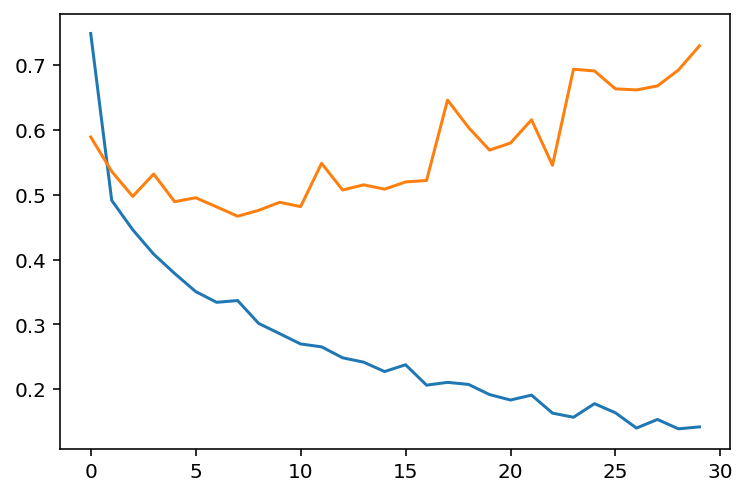

In [ ]:
# Grafique train_losses y test_losses
plt.plot(train_losses)
plt.plot(test_losses)

<font color='green'>**Fin Actividad 5**</font>

### Overfitting

Si observamos los errores  de entrenamiento y validación a medida que entrenamos la red, podemos ver un fenómeno conocido como sobreajuste.


![OverFitting](https://drive.google.com/uc?export=view&id=1q2B9ov7gq0-Ae1-_2QWqBMJ1FP8tmBYM)


La red aprende el conjunto de entrenamiento cada vez mejor, lo que resulta en menores errores de entrenamiento. Sin embargo, comienza a tener problemas para generalizar los datos fuera del conjunto de entrenamiento, lo que lleva a que aumente el error de validación. El objetivo final de cualquier modelo de aprendizaje profundo es hacer predicciones sobre nuevos datos, por lo que debemos esforzarnos por obtener el menor error de validación posible. Una opción es usar la versión del modelo con la pérdida de validación más baja, aquí la de alrededor de 8-10 épocs de entrenamiento. Esta estrategia se llama *parada anticipada*. En la práctica, guardaría el modelo con frecuencia mientras entrena y luego elegiría el modelo con la menor pérdida de validación.

El método más común para reducir el sobreajuste (fuera de la detención anticipada) es *dropout*, donde abandonamos aleatoriamente las unidades de entrada. Esto obliga a la red a compartir información entre pesos, lo que aumenta su capacidad de generalizar a nuevos datos. Agregar abandono en PyTorch es sencillo usando el módulo [`nn.Dropout`] (https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout).


```python
        x = self.dropout(F.relu(self.fc3(x)))
        return x
```
Durante el entrenamiento queremos usar el dropout para evitar el sobreajuste, pero durante la inferencia queremos usar toda la red. Por lo tanto, debemos desactivar el abandono durante la validación, las pruebas y cada vez que usemos la red para hacer predicciones. Para hacer esto, usa `model.eval ()`. Esto establece el modelo en modo de evaluación donde la probabilidad de abandono es 0. Puede volver a activar el abandono configurando el modelo en modo de entrenamiento con `model.train ()`. En general, el patrón para el bucle de validación se verá así, donde apaga los gradientes, establece el modelo en modo de evaluación, calcula la pérdida de validación y la métrica, luego establece el modelo nuevamente en modo de entrenamiento.

```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

In [ ]:
# Definimos el dropout para luego utilizaro
p = 0.5
drop_layer = nn.Dropout(p)
drop_layer

Dropout(p=0.5, inplace=False)

In [ ]:
x = torch.randn(5,5)
x

tensor([[-0.1450,  1.0270,  0.3698,  0.9006, -1.3335],
        [-1.4631, -0.1544, -1.3261, -0.7972,  0.4137],
        [ 0.7010,  0.0647, -0.3710, -0.1842,  0.5243],
        [-0.8555,  1.5344, -0.5401,  0.3456,  0.1992],
        [ 0.0902, -0.2332,  0.7101,  1.7596,  0.0531]])

In [ ]:
x_dropped = drop_layer(x)
x_dropped

tensor([[-0.2900,  0.0000,  0.0000,  0.0000, -0.0000],
        [-0.0000, -0.3088, -0.0000, -0.0000,  0.8274],
        [ 0.0000,  0.1295, -0.7421, -0.3684,  1.0485],
        [-1.7110,  3.0689, -1.0803,  0.0000,  0.3985],
        [ 0.1804, -0.4663,  0.0000,  0.0000,  0.0000]])

In [ ]:
x.mean(), x.std()

(tensor(0.0516), tensor(0.8319))

In [ ]:
x_dropped.mean(),x_dropped.std()

(tensor(0.0274), tensor(0.8309))

## <font color='green'>**Actividad 6**</font>

Implemente equivalente a la **Actividad 5**, pero defina una red utilizando dropout.

In [ ]:
# Defina su red
class Classifier2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.dropout1 = nn.Dropout(0.2) # empiricamente entre 0.05 a 0.2 para las entradas
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5) # 0.2 a 0.5 para las capas intermedias
        self.fc3 = nn.Linear(128, 64)
        
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        #x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
# El entrenamiento y validación esigual al anterior
%%time
model = Classifier2()
criterion = nn.NLLLoss() # Funcion loss.
optimizer = optim.Adam(model.parameters(), lr=0.003) # Metodo de optimizacion. 

epochs = 50
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    model.train()
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        # TO_DO
        # Realice el forward
        log_ps = model(images)
        # Aplique la función de perdida.
        loss = criterion(log_ps, labels)
        # Realice el backward
        loss.backward()
        # Optimice
        optimizer.step()
        # Acumule el running_loss
        running_loss += loss
    else:
        test_loss = 0
        accuracy = 0
        model.eval()
        # Apagamos los gradientes para la validación. Permite ahorrar memoria y computo. 
        with torch.no_grad():
            
            for images, labels in testloader:
                log_ps = model(images)
                # Aquí medimos el error en el conjunto de entrenamiento. 
                test_loss += criterion(log_ps, labels)
                # Como es logaritmo de la probabilidad, debemos aplicar la exponencial. 
                ps = torch.exp(log_ps)
                # La clase top 1.
                top_p, top_class = ps.topk(1, dim=1)
                # equals toma valores True or False.
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/50..  Training Loss: 1.194..  Test Loss: 0.719..  Test Accuracy: 0.700
Epoch: 2/50..  Training Loss: 0.864..  Test Loss: 0.667..  Test Accuracy: 0.752
Epoch: 3/50..  Training Loss: 0.784..  Test Loss: 0.637..  Test Accuracy: 0.749
Epoch: 4/50..  Training Loss: 0.747..  Test Loss: 0.635..  Test Accuracy: 0.776
Epoch: 5/50..  Training Loss: 0.726..  Test Loss: 0.615..  Test Accuracy: 0.768
Epoch: 6/50..  Training Loss: 0.707..  Test Loss: 0.560..  Test Accuracy: 0.788
Epoch: 7/50..  Training Loss: 0.702..  Test Loss: 0.592..  Test Accuracy: 0.780
Epoch: 8/50..  Training Loss: 0.687..  Test Loss: 0.565..  Test Accuracy: 0.798
Epoch: 9/50..  Training Loss: 0.665..  Test Loss: 0.552..  Test Accuracy: 0.805
Epoch: 10/50..  Training Loss: 0.641..  Test Loss: 0.571..  Test Accuracy: 0.800
Epoch: 11/50..  Training Loss: 0.634..  Test Loss: 0.540..  Test Accuracy: 0.810
Epoch: 12/50..  Training Loss: 0.660..  Test Loss: 0.551..  Test Accuracy: 0.814
Epoch: 13/50..  Training Loss: 0.639.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

Grafique train_losses y test_losses que almacenó anteriormente. 

In [ ]:
train_losses = [loss.detach().numpy() for loss in train_losses]
test_losses = [loss.detach().numpy() for loss in test_losses]
train_losses, test_losses

([array(1.1941141, dtype=float32),
  array(0.86406666, dtype=float32),
  array(0.78413326, dtype=float32),
  array(0.74675095, dtype=float32),
  array(0.7261504, dtype=float32),
  array(0.70740867, dtype=float32),
  array(0.7024361, dtype=float32),
  array(0.68675935, dtype=float32),
  array(0.66531986, dtype=float32),
  array(0.6414229, dtype=float32),
  array(0.6337363, dtype=float32),
  array(0.6596883, dtype=float32),
  array(0.63864005, dtype=float32),
  array(0.6312804, dtype=float32),
  array(0.6150906, dtype=float32),
  array(0.60790426, dtype=float32),
  array(0.59874547, dtype=float32),
  array(0.6099048, dtype=float32),
  array(0.6283277, dtype=float32),
  array(0.59202963, dtype=float32),
  array(0.5821943, dtype=float32),
  array(0.58552724, dtype=float32),
  array(0.59822536, dtype=float32),
  array(0.5849078, dtype=float32),
  array(0.58133346, dtype=float32),
  array(0.57069665, dtype=float32),
  array(0.5825734, dtype=float32),
  array(0.57092273, dtype=float32),
  arr

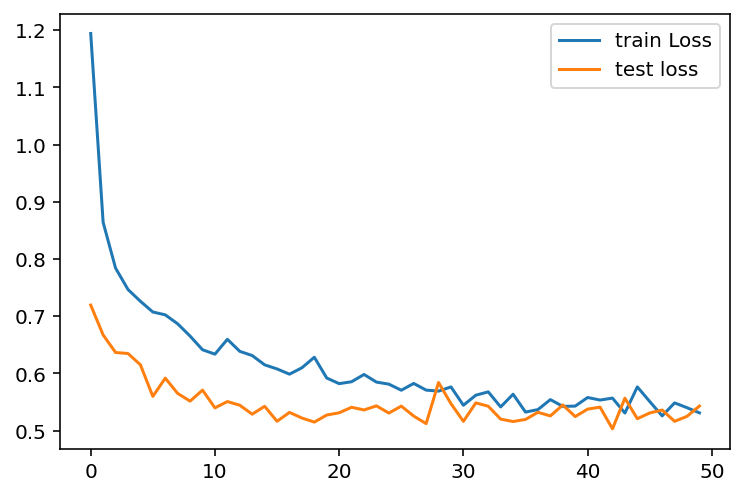

In [ ]:
# Grafique train_losses y test_losses
plt.plot(train_losses,label='train Loss')
plt.plot(test_losses, label='test loss')

plt.legend()

<font color='green'>**Fin Actividad 6**</font>

### Inferencia

Ahora que el modelo está entrenado, podemos usarlo para inferencia. Debemos configurar el modelo en modo de inferencia con `model.eval ()`. También querrás desactivar autograd con `torch.no_grad ()`.

Veamos como se realiza esto con Pytorch.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

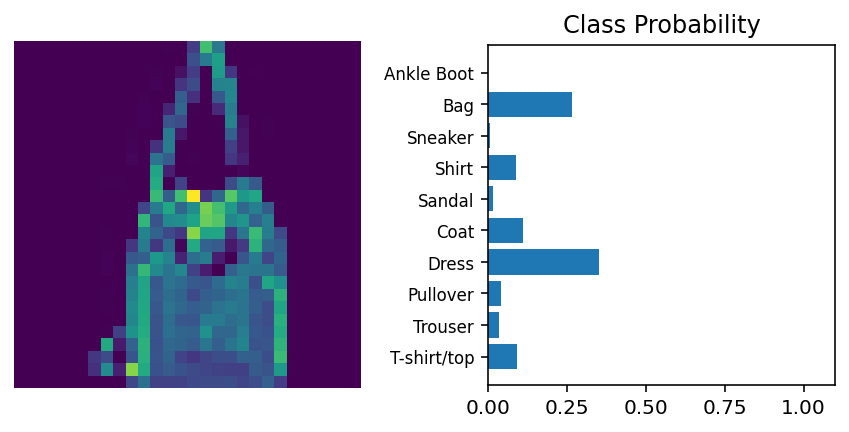

In [ ]:
# Probemos nuestra red.

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[10]
# Convirtiendo la imagen 2D a vector 1D.
img = img.view(1, 784)

# Calculando la probabilidad de las clases.
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Dibujando la imagen y las probabilidedes de las clases. 
view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [ ]:
# Adicional!
#entrenar gpu 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
%%time
model = Classifier()
criterion = nn.NLLLoss() # Funcion loss.
optimizer = optim.Adam(model.parameters(), lr=0.003) # Metodo de optimizacion. 

epochs = 30
steps = 0

model.to(device)

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        # TO_DO
        # Realice el forward
        log_ps = model(images)
        # Aplique la función de perdida.
        loss = criterion(log_ps, labels)
        # Realice el backward
        loss.backward()
        # Optimice
        optimizer.step()
        # Acumule el running_loss
        running_loss += loss
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Apagamos los gradientes para la validación. Permite ahorrar memoria y computo. 
        with torch.no_grad():
            for images, labels in testloader:
                images = images.cuda()
                labels = labels.cuda()

                log_ps = model(images)
                # Aquí medimos el error en el conjunto de entrenamiento. 
                test_loss += criterion(log_ps, labels)
                # Como es logaritmo de la probabilidad, debemos aplicar la exponencial. 
                ps = torch.exp(log_ps)
                # La clase top 1.
                top_p, top_class = ps.topk(1, dim=1)
                # equals toma valores True or False.
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.771..  Test Loss: 0.592..  Test Accuracy: 0.794
Epoch: 2/30..  Training Loss: 0.523..  Test Loss: 0.560..  Test Accuracy: 0.800
Epoch: 3/30..  Training Loss: 0.459..  Test Loss: 0.493..  Test Accuracy: 0.822
Epoch: 4/30..  Training Loss: 0.403..  Test Loss: 0.561..  Test Accuracy: 0.777
Epoch: 5/30..  Training Loss: 0.393..  Test Loss: 0.503..  Test Accuracy: 0.817
Epoch: 6/30..  Training Loss: 0.348..  Test Loss: 0.478..  Test Accuracy: 0.835
Epoch: 7/30..  Training Loss: 0.331..  Test Loss: 0.485..  Test Accuracy: 0.834
Epoch: 8/30..  Training Loss: 0.319..  Test Loss: 0.464..  Test Accuracy: 0.840
Epoch: 9/30..  Training Loss: 0.298..  Test Loss: 0.509..  Test Accuracy: 0.834
Epoch: 10/30..  Training Loss: 0.285..  Test Loss: 0.510..  Test Accuracy: 0.830
Epoch: 11/30..  Training Loss: 0.279..  Test Loss: 0.492..  Test Accuracy: 0.833
Epoch: 12/30..  Training Loss: 0.277..  Test Loss: 0.484..  Test Accuracy: 0.848
Epoch: 13/30..  Training Loss: 0.252.

In [ ]:
images.cpu() #traemos desde la tarjeta grafica, hacia la cpu para luego dar como respuesta una clasificacion